## Brayan Arturo Gonzalez Barron 1620548
# Importamos librerias

In [27]:

import pandas as pd
import matplotlib as plt
import seaborn as sn


importamos o cargamos la base de datos a trabajar en Data frame con nombre asignado de df

In [2]:
df = pd.read_csv("/home/brayan-gzz/Descargas/winemag-data_first150k.csv", encoding='utf8')

Contamos con 150930 registros y 11 columnas, una cantidad considerable de registros para poder tomar muestras y graficar 

In [3]:
df.shape

(150930, 11)

Mostramos Los primeros 30 registros para darnos una idea de los datos con los que estamos tratando y tambien darnos una idea de las posibles deduciones o posibles preguntas que podriamos responder

In [4]:
df.head(30)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


Obtenemos los tipos de cada clomuna para ver de que manera los podemos trabajar los datos y que modificaciones les podemos hacer para nuestra conveniencia, que por cierto podemos algunos pasarlos a float lo que nos representan numeros para trabajar con puros numeros flotantes y no hacer conversiones.

In [5]:
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Mostramos las columnas separadas de las filas para entrar en un contexto mas certero de la base de datos y podemos observar que tenemos el numero de registro, el pais, descripcion, precio, puntos, regiones, variedad que son los mas relevantes

In [6]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Observamos que tantos datos nulos tenemos, y determinar que como quedaria la muestra resultante despues de eliminar las filas con datos null o NaN

In [7]:
df.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

Eliminamos las filas con datos null

In [8]:
df_drop = df.dropna()

Y observamos cuantos registros nos quedaron despues de limpiar la base de esta manera

In [9]:
df=df_drop
df.shape

(39241, 11)

Analisis de Estadisticos

Podemos observar que tenemos 39241 registros confirmados, ya que en la instruccion pasada tambien nos arroja el mismo numero

In [10]:
df['description'].count()

39241

Tenemos una serie de estadisticos que nos que nos arrojan la media, el promedio, el valor minimo  y el la maxima puntuacion (todo esto con base a la puntuacion solamente)

In [11]:
df['points'].describe()

count    39241.000000
mean        88.359981
std          3.438542
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

Confirmamos la mediana o el valor que mas se repite

In [12]:
df['points'].median()

88.0

In [13]:
del df['Unnamed: 0']

Con la correlacion no arroja la relacion lineal que existe entre los puntos y el precio 

In [14]:
df.corr()

,points,price
points,1.000000,0.435628
price,0.435628,1.000000


Aqui obtenemos la variacion de los datos o que tanto varia que hay entre los puntos y el precio

In [15]:
df.cov()


,points,price
points,11.823571,40.019361
price,40.019361,713.773906


Sacacmos desviaciones estandar de de la puntuacion y el precio

In [16]:
df['points'].std()

3.4385419413760276

In [17]:
df['price'].std()

26.716547418483284

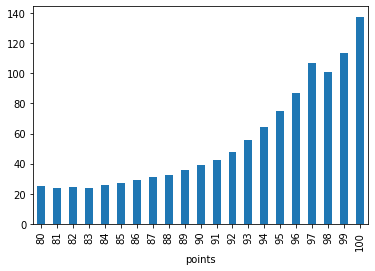

In [31]:
%matplotlib inline 
df.groupby('points')['price'].mean().plot.bar()

En esta grafica tenemos una correlacion entre los puntos y el precio de tal manera que apreciamos un compurtamiento no lineal con respecto a las cuspides de las barras entre mayor sea la puntuacion los el precio aumenta

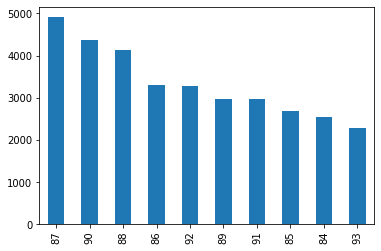

In [34]:
df['points'].value_counts().head(10).plot.bar()

Sobre esta grafica podemos observar cuanto las calficiaciones mas frecuentes en todos los vinos

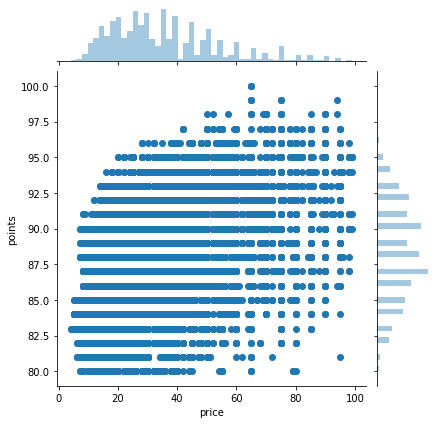

In [49]:
sn.jointplot(x='price', y='points', data=df[df['price'] < 100])


en esta grafica podemos observar que tan dispersos se encuentran los datos en funcion del puntaje que nos da un repectivo precio, la concentracion es de lado izquierdo, lo que nos indica que un comportamiento el cual es que la actividad de la evaluacion con respecto al precio es mayor cuando el precio baja, probablemente por lo accesible que se vuelve lo contrario del lado derecho.

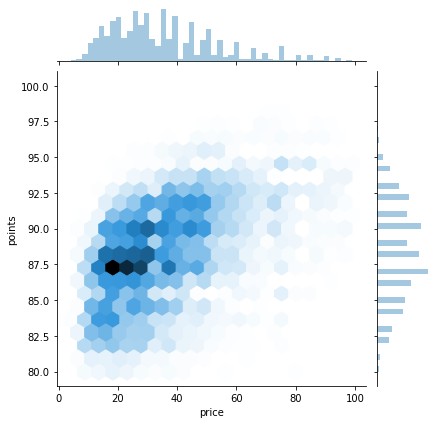

In [58]:
sn.jointplot(x='price', y='points', data=df[df['price'] < 100], kind='hex', 
              gridsize=20)

In [ ]:
Grafica que nos ayuda a determinar las concentaciones de los datos con los cuales podriamos marcar 